<a href="https://colab.research.google.com/github/rsj9987/tobenac/blob/master/titanic_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

import sys
import warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [3]:
import io

test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Laroche, Mr. Joseph Philippe Lemercier",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train.columns[3], train.columns[3:5]

('Name', Index(['Name', 'Sex'], dtype='object'))

In [12]:
train.shape

(891, 12)

In [13]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]
# 결과값으로 쓸 것을 다른 변수에 저장
y_train = train['Survived'].values
passId = test['PassengerId']

# 병합파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))



data size is: (1309, 12)


In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

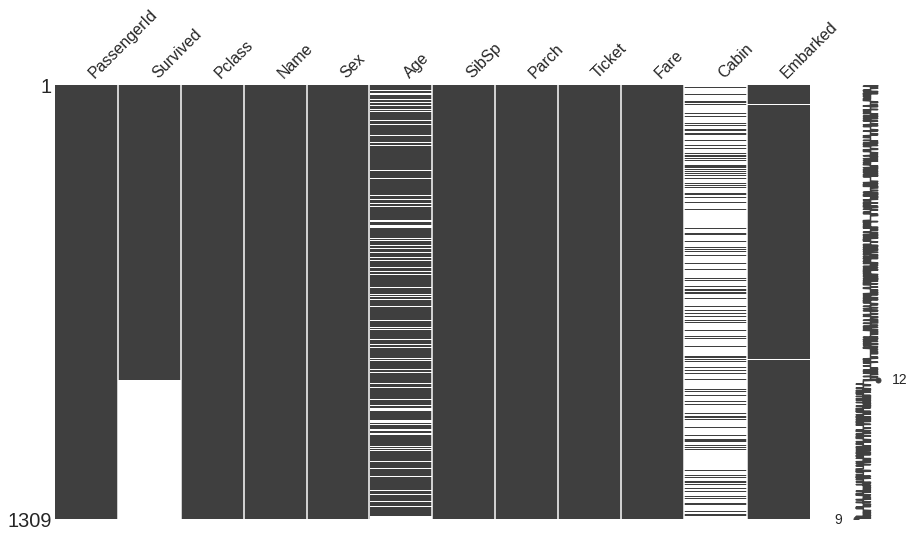

In [15]:
missingno.matrix(data, figsize=(15, 8))

In [16]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
data.Age.isnull().any()

True

In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


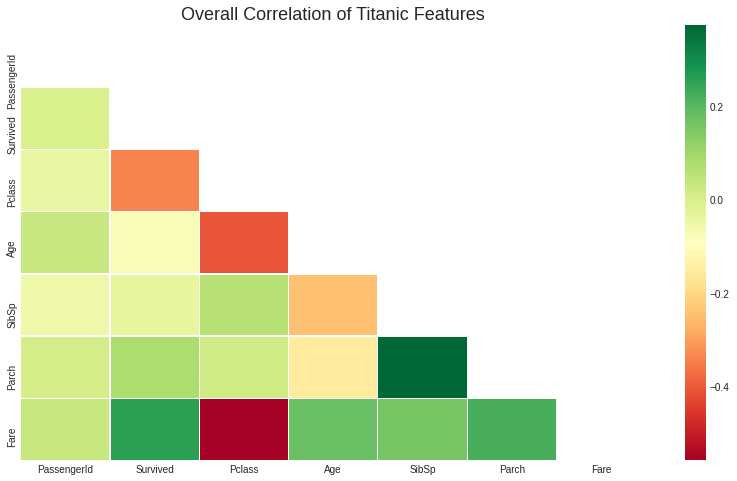

In [20]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

0    549
1    342
Name: Survived, dtype: int64


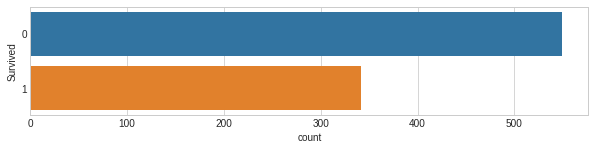

In [21]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

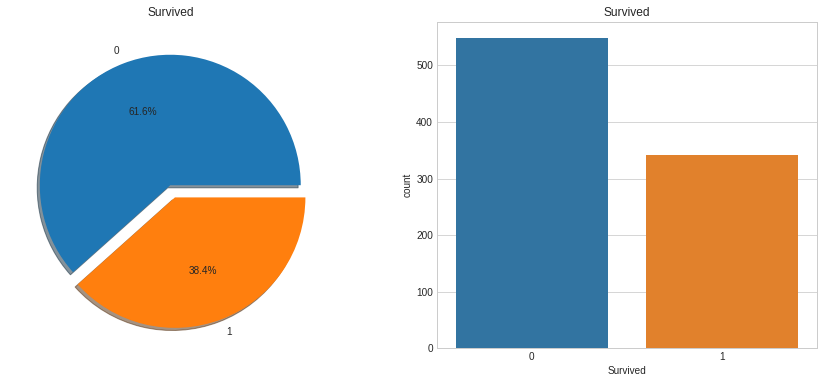

In [22]:
f,ax = plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [23]:
def piecount(col):
  # 1행 2열 가로 15, 세로 6 인치의 서브플롯
  f, ax = plt.subplots(1, 2, figsize=(15, 6))
  # col값의 숫자를 세서 파이플롯을 만든다. explode 0 . 1 의미 두번째 것이 튀어나옴을 의미 autopct 1.1 의미 앞자리 1이상, 소수점 이하 1자리
  train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
  ax[0].set_title(col)
  ax[0].set_ylabel('')
  sns.countplot(col, data=train, ax=ax[1])
  ax[1].set_title(col)
  plt.show()

# piecount('Survived')

In [24]:
train.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [25]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


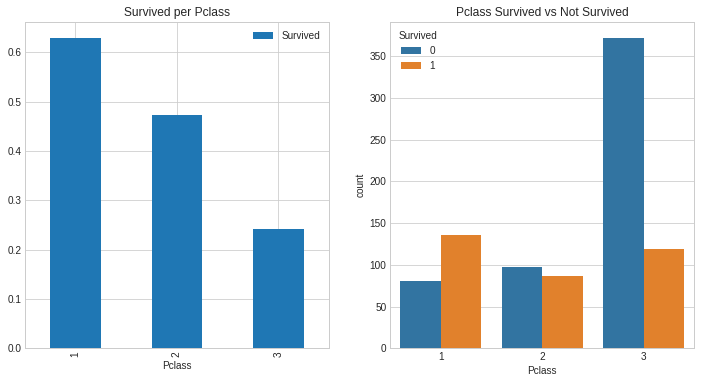

In [26]:
# 1행 2열, 12, 6 인치 
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# 'Pclass', 'Survived' 그룹 Pclass로 하고 평균을 바형태로 ax[0] 첫번째 플롯에 집어넣기
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
# 첫번째 플롯 타이틀
ax[0].set_title('Survived per Pclass')
# Pclass의 생존 합계를 두번째 플롯
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
# 두번째 플롯 타이틀
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()

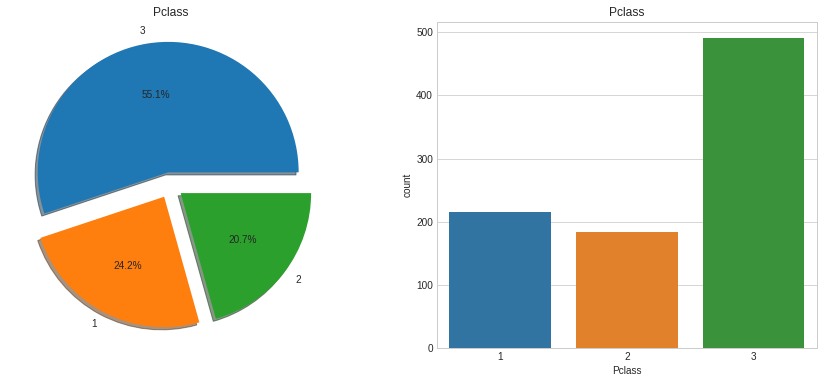

In [27]:
piecount("Pclass")

In [28]:
data.Name.value_counts()

Connolly, Miss. Kate                                       2
Kelly, Mr. James                                           2
Laroche, Mr. Joseph Philippe Lemercier                     1
Newell, Miss. Marjorie                                     1
Birkeland, Mr. Hans Martin Monsen                          1
                                                          ..
Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)    1
de Pelsmaeker, Mr. Alfons                                  1
Mallet, Mrs. Albert (Antoinette Magnin)                    1
Skoog, Miss. Margit Elizabeth                              1
Whabee, Mrs. George Joseph (Shawneene Abi-Saab)            1
Name: Name, Length: 1307, dtype: int64

In [29]:
# 안전을 위해 카피본 만들기
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [30]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Mme           1
Sir           1
Lady          1
Capt          1
Jonkheer      1
Countess      1
Don           1
Dona          1
Name: Initial, dtype: int64

In [31]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [32]:
def survpct(col):
  return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [33]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [34]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

In [35]:
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


In [36]:
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         198
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Lady          1
Mme           1
Capt          1
Jonkheer      1
Countess      1
Don           1
Sir           1
Name: Initial, dtype: int64

In [37]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [38]:
# Numname리스트에 Lastname을 숫자화 해서 넣어준다.
temp['NumName'] = temp['LastName'].factorize()[0]

In [39]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap="summer_r")

In [40]:
# 흔한이름인 Ali를 찾아서 데이터가 제대로 들어갔는지 NumName 확인
temp.loc[temp['LastName'] == 'Ali']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


In [41]:
# 성별 별로 생존수의 평균분석
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


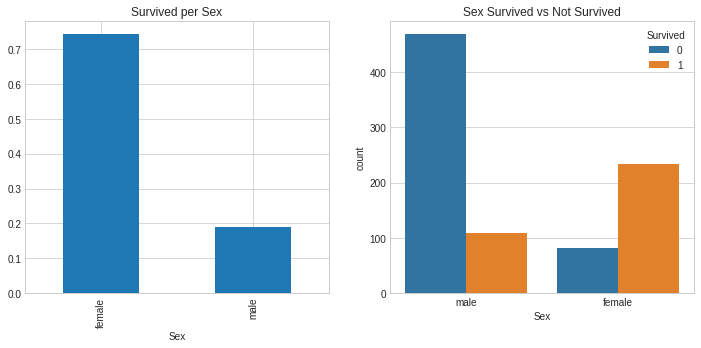

In [42]:
def bag(col, target, title, title1):
  f, ax = plt.subplots(1, 2, figsize=(12, 5))
  train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
  ax[0].set_title(title)
  sns.countplot(col, hue=target, data=train, ax=ax[1])
  ax[1].set_title(title1)
  plt.show()

bag('Sex', 'Survived', 'Survived per Sex', 'Sex Survived vs Not Survived')

In [43]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')
# 여자의 생존비율이 더 높은 것으로 봐서 신사도가 살아있었다고 볼 수 있다.

In [44]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')
# 최대 최소 평균 연령

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


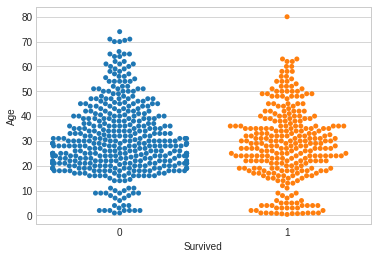

In [45]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

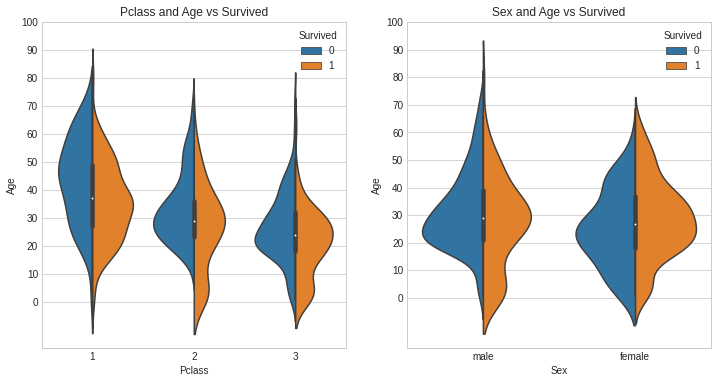

In [46]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# x축 Pclass, y축 Age 데이터 Survived split=False 일경우 나눠서 보여줌
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
# 0에서 110까지 10단위로 나누어
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [47]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) # 이니셜별 평균연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [48]:
# 이니셜별 평균 연령을 빈값에 넣기
temp = temp.reset_index(drop=True)
temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


In [200]:
# 이니셜값 대표값으로 대체변환
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)


In [201]:
# 나이를 데이터수의 범위로 나눔
temp['Age_Range'] = pd.qcut(temp['Age'], 10)

In [202]:
# 나이 범위와 평균산출
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [203]:
# Agroup을 생성하여 Range안에 있는 나이를 평균적인 Int로 표현
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <= 20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

In [204]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [205]:
# 남자, 여자, 아이로 구분
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [206]:
# 남자, 여자, 아이의 생존율
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [207]:
# Sibsp와 Parch를 통해 혼자인 사람과 가족으로 분류
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [208]:
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,2,2,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(8.05, 10.5]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,5,-1,1,2,1,3
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,0,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(39.688, 77.958]",8,2,0,0,8,0,4,0,0,8,0,4,2,8,6,-1,1,0,1,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,0,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1,"(14.454, 21.679]",5,0,0,0,8,0,5,0,0,8,0,5,4,5,7,-1,5,0,1,3
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,0,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1,"(10.5, 14.454]",5,0,0,8,0,2,0,0,8,0,2,0,5,5,8,-1,3,0,2,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,1,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1,"(27.0, 39.688]",7,3,6,8,0,2,0,6,8,0,2,0,5,7,9,-1,2,1,2,2


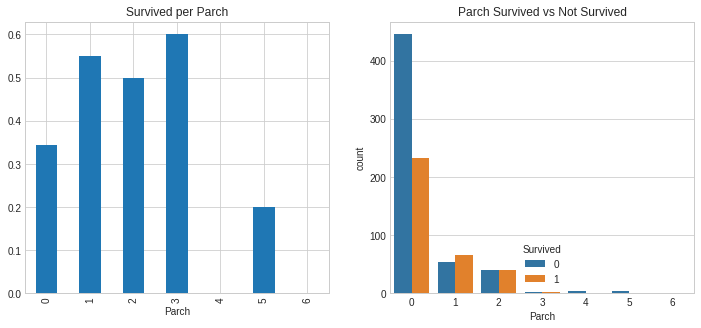

In [209]:
# Parch 별 생존률 확인
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')

In [210]:
# Family 수와 Pclass별 생존률 확인
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

In [211]:
# Ticket의 종류 파악
temp.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [212]:
# 공백이 있는지 확인
temp.Ticket.isnull().any()

False

In [213]:
# 티켓값을 string+num 값으로 잘라서 Initick에 넣기
temp['Initick'] = temp.Ticket.str.extract('([A-Za-z0-9]+)')
# 복사한 항목들을 사용하다보면 'ValueError: cannot reindex from duplicate axis' 라는 에러가 많이 나오는데
# reset_index 을 통하여 에러를 방지한다.
temp = temp.reset_index(drop=True)

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [214]:
# Ticket의 String값과 Num값 구분
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

In [215]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [216]:
# Initick값 factorizing
temp['NumTicket'] = temp['Initick'].factorize()[0]

In [217]:
temp.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,2,2,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(8.05, 10.5]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,5,-1,1,2,1,3
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,0,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(39.688, 77.958]",8,2,0,0,8,0,4,0,0,8,0,4,2,8,6,-1,1,0,1,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,0,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1,"(14.454, 21.679]",5,0,0,0,8,0,5,0,0,8,0,5,4,5,7,-1,5,0,1,3
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,0,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1,"(10.5, 14.454]",5,0,0,8,0,2,0,0,8,0,2,0,5,5,8,-1,3,0,2,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,1,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1,"(27.0, 39.688]",7,3,6,8,0,2,0,6,8,0,2,0,5,7,9,-1,2,1,2,2


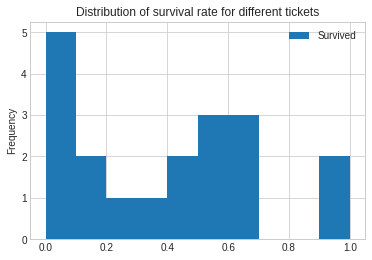

In [218]:
#티켓별 생존율을 히스토그램으로 표현
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survival rate for different tickets');

In [219]:
# Fare의 값 확인
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


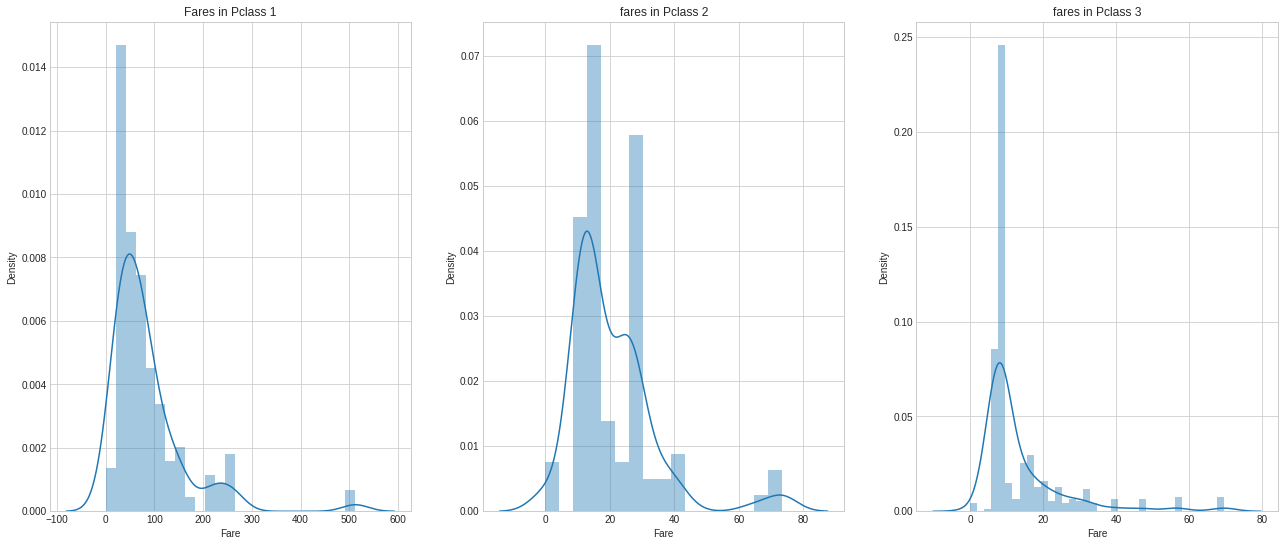

In [220]:
# Pclass 별 Fare 분포도
f, ax = plt.subplots(1, 3, figsize=(22, 9))
sns.distplot(train[train['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.distplot(train[train['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title("fares in Pclass 2")
sns.distplot(train[train['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title("fares in Pclass 3")
plt.show()


In [221]:
# 그룹의 Range와 평균 산출함수
def groupmean(a, b):
  return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range', 'Fare')


,Fare
Fare_Range,
"(-0.001, 7.55]",5.928717
"(7.55, 7.854]",7.768490
"(7.854, 8.05]",7.963669
"(8.05, 10.5]",9.521367
"(10.5, 14.454]",12.940231
"(14.454, 21.679]",17.386408
"(21.679, 27.0]",25.487501
"(27.0, 39.688]",32.282186
"(39.688, 77.958]",59.444572


In [222]:
# Fare 를 그룹화하여 보기 쉬운 숫자로 정렬
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [223]:
# Cabin 값확인
temp.Cabin.value_counts().head(10)

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
B96 B98            4
F2                 4
F33                4
C22 C26            4
D                  4
F4                 4
Name: Cabin, dtype: int64

In [224]:
# Cabin null값 확인
temp.Cabin.isnull().sum()

1014

In [225]:
# inicab에 Pclass1 = X, Pclass2 = Y, Pclass3 = Z로 분류하여 null값 처리
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,Z,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,C,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,Z,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,C,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,Z,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [226]:
# Inicab 숫자화(factorizing)
temp['Inicab'] = temp['Inicab'].factorize()[0]

temp.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,0,0,0,2,0,3,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,1,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,0,0,7,0,6,0,0,7,0,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,0,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,1,2,8,0,2,0,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,4,-1,1,0,1,3
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,2,2,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(8.05, 10.5]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,5,-1,1,2,1,3
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,0,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(39.688, 77.958]",8,2,0,0,8,0,4,0,0,8,0,4,2,8,6,-1,1,0,1,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,0,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1,"(14.454, 21.679]",5,0,0,0,8,0,5,0,0,8,0,5,4,5,7,-1,5,0,1,3
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,0,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1,"(10.5, 14.454]",5,0,0,8,0,2,0,0,8,0,2,0,5,5,8,-1,3,0,2,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,1,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1,"(27.0, 39.688]",7,3,6,8,0,2,0,6,8,0,2,0,5,7,9,-1,2,1,2,2


In [227]:
# Embarked 분석
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap="summer_r")

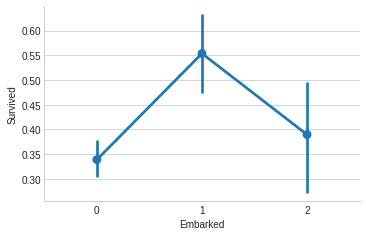

In [228]:
# 출발항구별 생존율을 확인하기 위해 factorplot 생성
sns.factorplot('Embarked', 'Survived', data=temp)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

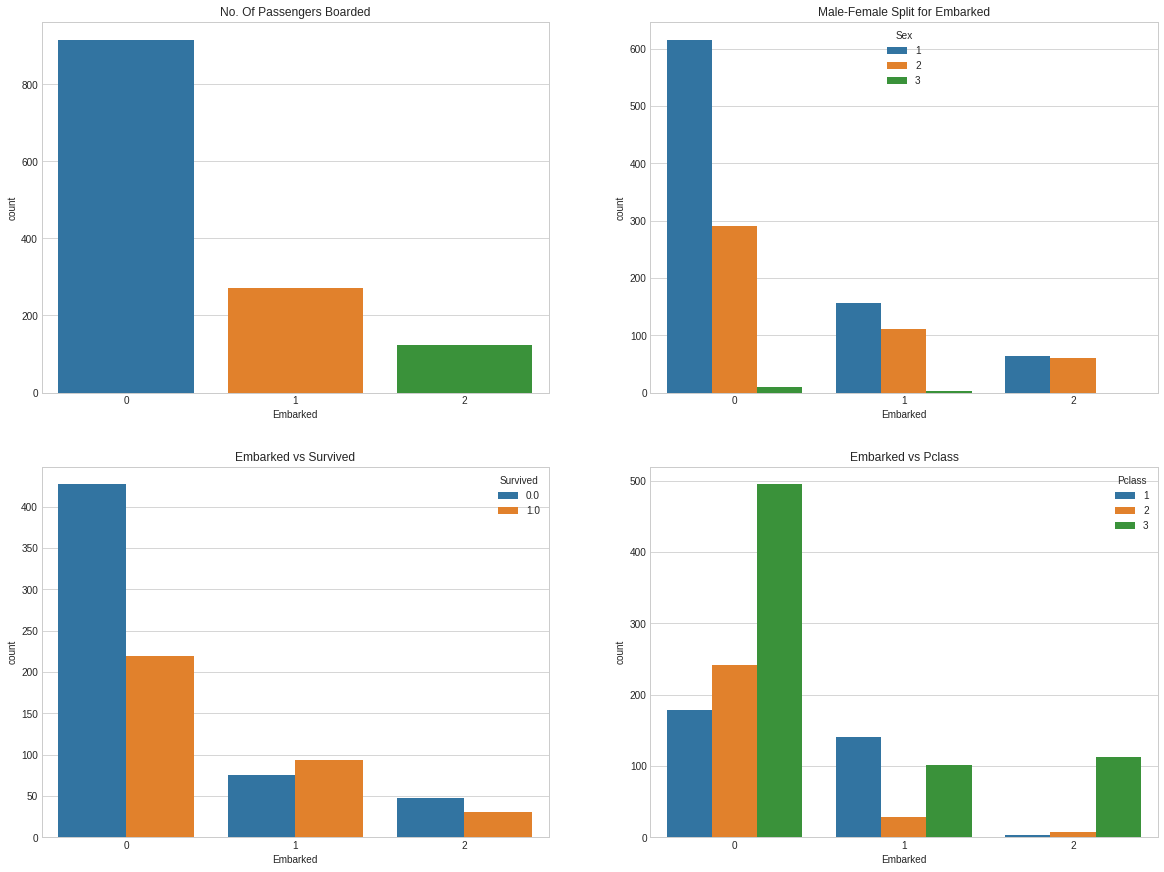

In [229]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
# 승선항구별 승선인원 카운트 플롯 생성
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
# 승선 항구별 성별 카운트 플롯 생성
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
# 승선 항구별 생존 수 카운트 플롯 생성
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
# 승선 항구별 클래스 수 카운트 플롯 생성
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
# 플롯 여백
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [230]:
# 승선항구 데이터의 NaN값 확인
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13


In [231]:
# NaN값을 데체할 값 확인
temp.sort_values(['Ticket'], ascending=True)[55:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,B30,1,2,Ostby,51,"(48.0, 80.0]",60,NaN,2,NaN,-1,"(39.688, 77.958]",8,8,0,0,8,0,2,0,0,8,0,2,2,8,51,-1,2,1,1,1
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,C128,0,2,Williams,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(27.0, 39.688]",7,1,0,0,8,0,4,0,0,8,0,4,2,7,17,-1,1,0,1,1
252,253,0.0,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,C87,0,2,Stead,217,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1,0,0,8,0,4,0,0,8,0,4,2,6,217,-1,1,0,1,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,B28,0,5,Stone,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8,7,8,0,4,0,7,8,0,4,0,5,9,616,-1,1,0,2,1
61,62,1.0,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,B28,0,4,Icard,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8,7,8,0,4,0,7,8,0,4,0,4,9,58,-1,1,0,2,1
802,803,1.0,1,"Carter, Master. William Thornton II",1,11.000000,1,2,113760,120.0000,B96 B98,0,4,Carter,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8,7,0,8,0,2,7,0,8,0,2,4,9,215,-1,4,0,1,1
390,391,1.0,1,"Carter, Mr. William Ernest",1,36.000000,1,2,113760,120.0000,B96 B98,0,2,Carter,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8,7,0,8,0,2,7,0,8,0,2,2,9,215,-1,4,0,1,1
435,436,1.0,1,"Carter, Miss. Lucile Polk",2,14.000000,1,2,113760,120.0000,B96 B98,0,4,Carter,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8,7,8,0,2,0,7,8,0,2,0,4,9,215,-1,4,0,2,1
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",2,36.000000,1,2,113760,120.0000,B96 B98,0,5,Carter,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8,7,8,0,2,0,7,8,0,2,0,5,9,215,-1,4,0,2,1
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",1,32.252151,0,0,113767,50.0000,A32,0,2,Rood,162,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(39.688, 77.958]",7,6,0,0,8,0,4,0,0,8,0,4,2,7,162,-1,1,0,1,1


In [232]:
temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S' # 승선항구의 NaN값 S값으로 데체

In [233]:
temp.loc[(temp.Embarked.isnull())] # NaN값 있는지 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13


In [234]:
# 승선항구 값 숫자화
temp['Embarked'] = temp['Embarked'].factorize()[0]

temp[10:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab,Priority,FH,MH,FL,ML,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",2,4.000000,1,1,PP 9549,16.7000,G6,0,4,Sandstrom,10,"(0.169, 16.0]",7,NaN,3,PP,3,"(14.454, 21.679]",5,4,0,8,0,2,0,0,8,0,2,0,4,5,10,3,3,0,2,3
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,0,4,Bonnell,11,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1,2,8,0,4,0,2,8,0,4,0,4,6,11,-1,1,0,2,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,0,2,Saundercock,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0,0,0,1,0,6,0,0,1,0,6,2,4,12,0,1,0,1,3
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,0,2,Andersson,13,"(33.0, 39.0]",45,NaN,7,NaN,-1,"(27.0, 39.688]",7,0,0,0,8,0,5,0,0,8,0,5,2,7,13,-1,7,0,1,3
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,0,4,Vestrom,14,"(0.169, 16.0]",13,1.0,1,NaN,-1,"(7.55, 7.854]",2,0,0,1,0,6,0,0,1,0,6,0,4,2,14,-1,1,0,2,3
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,0,5,Hewlett,15,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(14.454, 21.679]",5,3,6,8,0,4,0,6,8,0,4,0,5,5,15,-1,1,0,2,2
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,2,4,Rice,16,"(0.169, 16.0]",2,NaN,6,NaN,-1,"(27.0, 39.688]",7,0,0,0,8,0,5,0,0,8,0,5,4,7,16,-1,6,2,1,3
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,0,2,Williams,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(10.5, 14.454]",5,3,0,0,8,0,4,0,0,8,0,4,2,5,17,-1,1,0,1,2
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,0,5,Vander,18,"(30.0, 32.252]",31,NaN,2,NaN,-1,"(14.454, 21.679]",5,0,0,8,0,2,0,0,8,0,2,0,5,5,18,-1,2,0,2,3
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,NaN,1,5,Masselmani,19,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(-0.001, 7.55]",2,0,0,1,0,6,0,0,1,0,6,0,5,2,19,-1,1,1,2,3


In [235]:
survpct('Initial') # 이니셜별 생존률

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [236]:
survpct('Pclass') # 클래스별 생존률

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [237]:
survpct('Age').head(30) # 나이별 생존률

Age
0.170000          NaN
0.330000          NaN
0.420000     1.000000
0.670000     1.000000
0.750000     1.000000
0.830000     1.000000
0.920000     1.000000
1.000000     0.714286
2.000000     0.300000
3.000000     0.833333
4.000000     0.700000
5.000000     1.000000
5.482642     0.500000
6.000000     0.666667
7.000000     0.333333
8.000000     0.500000
9.000000     0.250000
10.000000    0.000000
11.000000    0.250000
11.500000         NaN
12.000000    1.000000
13.000000    1.000000
14.000000    0.500000
14.500000    0.000000
15.000000    0.800000
16.000000    0.352941
17.000000    0.461538
18.000000    0.346154
18.500000         NaN
19.000000    0.360000
Name: Survived, dtype: float64

In [238]:
survpct('Fgroup') # 청구요금분위별 생존률

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [239]:
survpct('Sex') # 성별 별 생존율

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [240]:
# 높은 생존율 리스트
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [241]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [242]:
temp.Priority.value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

In [243]:
survpct('Family') # 가족단위별 생존율

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [244]:
survpct('Fgroup') # 청구요금분위별 생존률

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [245]:
# 여성의 높은 생존율 리스트
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

In [246]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [247]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

In [248]:
# 남자의 높은생존율 리스트
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8


In [249]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [250]:
temp.MH.value_counts()

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64

In [251]:
# 여성의 낮은 생존율 리스트
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

In [252]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [253]:
temp.FL.value_counts()

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64

In [254]:
# 남성의 낮은 생존률 리스트
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [255]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [256]:
temp.ML.value_counts()

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64

In [257]:
# Feature 만들기
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

In [258]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [259]:
dfl = pd.DataFrame() # for label encoding

In [260]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13'] # 해당 Columns 만들고,
dfl[good_columns] = temp[good_columns] # Columns에 해당하는 것만 복사사

In [261]:
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [262]:
dfh = dfl.copy()

In [263]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
                          
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,1,1,0,0,2
1,2,5,0,2,0,4,8,1,2,1,1,1,0
2,0,4,0,5,0,3,3,2,3,0,0,1,2
3,2,5,0,2,0,4,8,3,0,1,0,1,0
4,0,0,1,0,6,1,4,4,0,0,0,0,2


In [264]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)
dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,F2_2,F2_3,F2_7,F2_8,F3_0,F3_1,F3_2,F3_3,F3_5,F3_6,F3_7,F3_8,F4_0,F4_1,F4_2,F4_4,F4_5,F4_6,F5_0,F5_1,F5_2,F5_3,F5_4,F5_5,F5_6,F6_1,F6_2,F6_3,F6_4,F6_5,...,F8_852,F9_-1,F9_0,F9_1,F9_2,F9_3,F9_4,F9_5,F9_6,F9_7,F9_8,F9_9,F9_10,F9_11,F9_12,F9_13,F9_14,F9_15,F9_16,F9_17,F9_18,F9_19,F10_1,F10_2,F10_3,F10_4,F10_5,F10_6,F10_7,F10_8,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [272]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [273]:
X_test = test
X_train = train

In [274]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [275]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

In [276]:
# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# 연속적으로 모델학습시키고 교차검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

In [277]:
#결과 테이블을 만든다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)# reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
XGBoost,0.833333,0.820225,0.775281,0.898876,0.853933,0.831461,0.853933,0.764045,0.853933,0.842697,0.832772
Bagging Classifier,0.833333,0.808989,0.786517,0.887640,0.887640,0.842697,0.842697,0.764045,0.842697,0.831461,0.832772
Extra Trees,0.788889,0.853933,0.752809,0.887640,0.887640,0.842697,0.842697,0.775281,0.865169,0.820225,0.831698
SVC,0.833333,0.887640,0.797753,0.876404,0.865169,0.797753,0.808989,0.764045,0.865169,0.820225,0.831648
Random Forest,0.777778,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.775281,0.853933,0.820225,0.830587
Gradient Boosting,0.811111,0.831461,0.775281,0.876404,0.865169,0.831461,0.842697,0.797753,0.831461,0.842697,0.830549
Logistic Regression,0.800000,0.853933,0.797753,0.865169,0.876404,0.808989,0.820225,0.786517,0.853933,0.820225,0.828315
AdaBoost,0.811111,0.842697,0.786517,0.887640,0.853933,0.808989,0.808989,0.797753,0.820225,0.831461,0.824931
K Nearest Neighbour,0.788889,0.808989,0.786517,0.797753,0.842697,0.786517,0.786517,0.730337,0.842697,0.831461,0.800237
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.528090,0.426966,0.561798,0.550562,0.606742,0.549975


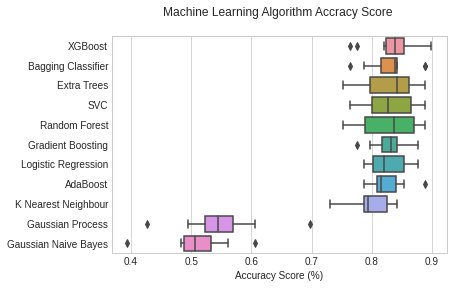

In [278]:
# 정확도 점수 표를 만든다
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title("Machine Learning Algorithm Accracy Score \n")
plt.xlabel('Accuracy Score (%)');


In [285]:
# 중요도 확인함수
def importance_plotting(data, xlabel, ylabel, title, n=20):
  sns.set(style="whitegrid")
  ax = data.tail(n).plot(kind='barh')

  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
  ax.xaxis.grid(False)
  ax.yaxis.grid(True)
  plt.show()

In [286]:
# 데이터 프레임에 항목 중요도를 넣는다.
fi = {'Features' : train.columns.tolist(), 'Importance' : xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

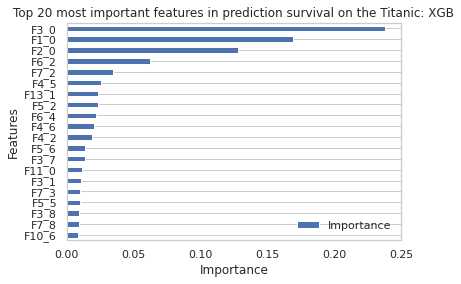

In [287]:
# 그래프 저목
title = 'Top 20 most important features in prediction survival on the Titanic: XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

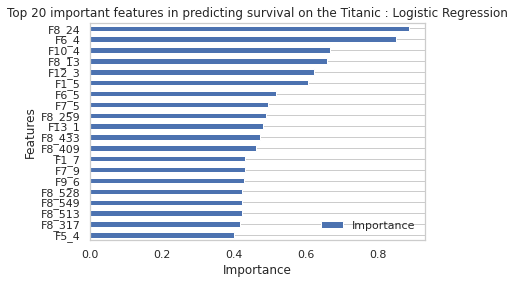

In [288]:
# 중요도를 데이터 프레임에 놓는다. Lpgistic regression에서 중요도보다 coefficients를 사용한다.
# Features 열에 train의 열들의 이름을 리스트로 만들어서 넣고, Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령이다.(즉 가로를 세로로)
fi = {'Features' : train.columns.tolist(), 'Importance' : np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic : Logistic Regression'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [290]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature' : train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature' : train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature' : train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature' : train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature' : train.columns, 'ada importance':ada.feature_importances_})

# 하나의 데이터 프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

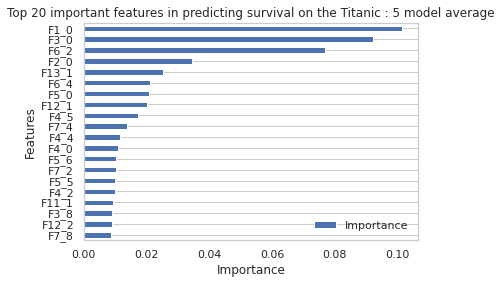

In [292]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features' : importances['Feature'], 'Importance' : importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic : 5 model average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [294]:
importance1 = importance[-381:]

importance1[371:381]

,Importance
Features,
F7_4,0.013961
F4_5,0.017334
F12_1,0.020040
F5_0,0.020794
F6_4,0.021212
F13_1,0.025251
F2_0,0.034624
F6_2,0.076929
F3_0,0.092119


In [295]:
#영양가 있는 380개만 넣기
mylist = list(importance1.index)

In [296]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
  train1[i] = train[i]
  test1[i] = test[i]

train1.head()

,F8_135,F8_386,F8_425,F8_494,F8_321,F8_432,F8_92,F8_531,F8_294,F8_111,F8_424,F8_447,F8_564,F8_304,F8_90,F8_82,F8_641,F8_6,F8_61,F8_426,F8_98,F8_624,F8_545,F8_514,F8_589,F8_86,F8_29,F3_6,F8_358,F8_550,F8_77,F8_189,F8_251,F8_254,F8_235,F8_307,F8_248,F8_160,F8_161,F8_80,...,F8_177,F8_173,F8_298,F4_6,F8_285,F8_76,F8_613,F8_360,F9_9,F10_4,F5_2,F3_1,F7_9,F8_24,F8_256,F2_8,F13_3,F3_7,F8_409,F11_0,F7_8,F12_2,F3_8,F11_1,F4_2,F5_5,F7_2,F5_6,F4_0,F4_4,F7_4,F4_5,F12_1,F5_0,F6_4,F13_1,F2_0,F6_2,F3_0,F1_0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1


In [299]:
train = train1
test = test1
# 모델의 변수를 다시 정의
X_train = train
X_test = test

# 바꿈
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [303]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Nighbour', 'Logistic regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', ' Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
score2 = {}

# 학습 및 교차 검증
for ind, mod in enumerate(models):
  mod.fit(X_train, y_train)
  acc = cross_val_score(mod, X_train, y_train, scoring='accuracy', cv=10)
  score2[model_names[ind]] = acc


In [304]:
results =pd.DataFrame(score2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False) #reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.822222,0.865169,0.808989,0.865169,0.865169,0.842697,0.853933,0.764045,0.831461,0.831461,0.835031
Logistic regression,0.822222,0.865169,0.797753,0.842697,0.865169,0.820225,0.808989,0.808989,0.865169,0.831461,0.832784
Random Forest,0.811111,0.865169,0.775281,0.887640,0.876404,0.820225,0.831461,0.764045,0.853933,0.831461,0.831673
XGBoost,0.811111,0.820225,0.775281,0.898876,0.853933,0.831461,0.853933,0.764045,0.853933,0.842697,0.830549
Gradient Boosting,0.822222,0.831461,0.775281,0.876404,0.865169,0.820225,0.842697,0.797753,0.831461,0.842697,0.830537
Extra Trees,0.788889,0.887640,0.741573,0.887640,0.887640,0.853933,0.831461,0.764045,0.831461,0.820225,0.829451
AdaBoost,0.800000,0.842697,0.786517,0.876404,0.853933,0.808989,0.808989,0.808989,0.820225,0.831461,0.823820
Gaussian Process,0.788889,0.786517,0.752809,0.775281,0.853933,0.808989,0.764045,0.775281,0.842697,0.842697,0.799114
K Nearest Nighbour,0.744444,0.764045,0.752809,0.842697,0.808989,0.820225,0.808989,0.730337,0.842697,0.820225,0.793546
SVC,0.755556,0.797753,0.775281,0.764045,0.842697,0.764045,0.764045,0.797753,0.842697,0.831461,0.793533


Text(0.5, 0, 'Accuracy Score (%)')

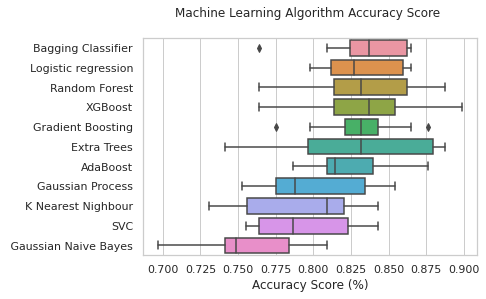

In [305]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title("Machine Learning Algorithm Accuracy Score \n")
plt.xlabel('Accuracy Score (%)')

In [308]:
#SVC
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20 , 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C' : Cs, 'gamma' : gammas}

# 교차검증
gd = GridSearchCV(estimator=SVC(probability=True), param_grid = hyperparams,
                  verbose=True, cv=5, scoring="accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


0.8350134957002073
{'C': 5, 'gamma': 0.001}


In [312]:
#Gradient Boosting Classifier
# learning_rate 각 트리의 기여를 줄이는 역할
# n_estimator 각 경우의 트리 숫자
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.8min finished


0.840631473228297
{'learning_rate': 0.5, 'n_estimators': 100}


In [315]:
#Logistic Regression
# penalty L1 = Lasso Regression, L2 = Ridge Regression
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty' : penalty, 'C' : C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams,
                  verbose = True, cv = 5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8294206264515724
{'C': 1.0, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


In [317]:
# XGBoost step1
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {"learning_rate" : learning_rate, "n_estimators" : n_estimators}

gd = GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams,
                  verbose = True, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.1min finished


0.8271922666499277
{'learning_rate': 0.1, 'n_estimators': 100}


In [319]:
# XGBoost step2
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth' : max_depth, 'min_child_weight' : min_child_weight}

gd = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 100), param_grid = hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.3min finished


0.8283095850856821
{'max_depth': 3, 'min_child_weight': 6}


In [321]:
# XGBoost step3
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma' : gamma}

gd = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3,
                                            min_child_weight=6), param_grid = hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.2s finished


0.8327914129684265
{'gamma': 0.1}


In [322]:
# XGBoost step4
subsmaple = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

hyperparams = {'subsmaple' : subsmaple, 'colsample_bytree' : colsample_bytree}

gd = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3,
                                            min_child_weight=6, gamma=0.1), param_grid = hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.5min finished


0.8327914129684265
{'colsample_bytree': 1, 'subsmaple': 0.6}


In [324]:
# XGBoost Step5
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
hyperparams = {'reg_alpha' : reg_alpha}

gd = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3,
                                            min_child_weight=6, gamma=0.1, subsmaple=0.6, colsample_bytree=1), 
                  param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.8s finished


0.8339150084740444
{'reg_alpha': 0.01}


In [325]:
# Gaussian Process
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer' : n_restarts_optimizer, 'max_iter_predict' : max_iter_predict, 'warm_start' : warm_start}

gd = GridSearchCV(estimator= GaussianProcessClassifier(), param_grid = hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.6min finished


0.8013495700207143
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


In [327]:
# Adaboost
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate}

gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.6min finished


0.8350072186303434
{'learning_rate': 0.5, 'n_estimators': 200}


In [329]:
# KNN
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm' : algorithm, 'weights' : weights, 'leaf_size' : leaf_size,
               'n_neighbors' : n_neighbors}

gd = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.2s


0.8227041616973197
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


In [330]:
# Random Forest
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators' : n_estimators, 'max_depth' : max_depth, 'max_features' : max_features,
               'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

gd = GridSearchCV(estimator = RandomForestClassifier(), param_grid=hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)


gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.2min finished


0.8361370912058252
{'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 50}


In [335]:
# Extra Trees
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators' : n_estimators, 'max_depth' : max_depth, 'max_features' : max_features,
              'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

gd = GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)


gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   42.9s


0.83611198292637
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.6min finished


In [338]:
# Bagging Classifier
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators' : n_estimators, 'max_samples' : max_samples, 'max_features' : max_features}

gd = GridSearchCV(estimator = BaggingClassifier(), param_grid=hyperparams,
                  verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  3.0min finished


0.8428723871696693
{'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 75}


In [339]:
# 튜닝 모델 시작
# sample을 split하는 것은 전체 데이터 80&를 트레인셋에 20%는 테스트 셋
ran = RandomForestClassifier(max_depth =  None, max_features = 0.8, min_samples_leaf = 6, min_samples_split = 2, n_estimators = 50)

knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 4, weights = 'distance')

log = LogisticRegression(C = 1.0, penalty = 'l2')

xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, 
                    min_child_weight=6, gamma=0.1, subsmaple=0.6, colsample_bytree=1, reg_alpha = 0.01)

gbc = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 100)

svc = SVC(probability=True, gamma=0.001, C=5)

ext = ExtraTreesClassifier(max_depth = None, max_features = 0.1, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 10)

ada = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 200)

gpc = GaussianProcessClassifier(max_iter_predict = 1, n_restarts_optimizer = 0, warm_start = True)

bag = BaggingClassifier(max_features = 0.8, max_samples = 1.0, n_estimators = 75)

# 리스트 작성
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

# 모든 모델 교차검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc


In [340]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11) 

,0,1,2,3,4,5,6,7,8,9,mean
XGBoost,0.833333,0.820225,0.775281,0.898876,0.853933,0.831461,0.853933,0.764045,0.853933,0.842697,0.832772
Bagging Classifier,0.833333,0.808989,0.786517,0.887640,0.887640,0.842697,0.842697,0.764045,0.842697,0.831461,0.832772
Extra Trees,0.788889,0.853933,0.752809,0.887640,0.887640,0.842697,0.842697,0.775281,0.865169,0.820225,0.831698
SVC,0.833333,0.887640,0.797753,0.876404,0.865169,0.797753,0.808989,0.764045,0.865169,0.820225,0.831648
Random Forest,0.777778,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.775281,0.853933,0.820225,0.830587
Gradient Boosting,0.811111,0.831461,0.775281,0.876404,0.865169,0.831461,0.842697,0.797753,0.831461,0.842697,0.830549
Logistic Regression,0.800000,0.853933,0.797753,0.865169,0.876404,0.808989,0.820225,0.786517,0.853933,0.820225,0.828315
AdaBoost,0.811111,0.842697,0.786517,0.887640,0.853933,0.808989,0.808989,0.797753,0.820225,0.831461,0.824931
K Nearest Neighbour,0.788889,0.808989,0.786517,0.797753,0.842697,0.786517,0.786517,0.730337,0.842697,0.831461,0.800237
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.528090,0.426966,0.561798,0.550562,0.606742,0.549975


TypeError: ignored

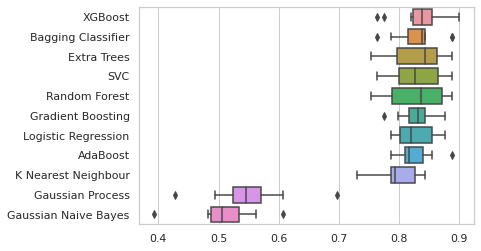

In [341]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title("Machine Learning Algorithm Accuracy Score \n")
plt.xlabel("Accuracy Score (%)")

In [343]:
# 튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran),
                                           ('Logistic Regression', log,),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neigbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}".format(grid_hard_cv['test_score'].mean() * 100))


Hard voting on test set score mean: 84.62


In [345]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran),
                                           ('Logistic Regression', log,),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neigbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}".format(grid_soft_cv['test_score'].mean()*100))

Soft voting on test set score mean: 84.85


In [346]:
# Final predictions2
predictions = grid_hard.predict(X_test)
submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission1.csv', header = True, index = False)

In [347]:
# Final predictions
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission2.csv', header = True, index = False)